# Differential Chromatin Interaction

Do the DCI(differential chromatin interaction) analysis between two Hi-C matrics.
The Selfish method used here is described in the paper:

> Abbas Roayaei Ardakany, Ferhat Ay, Stefano Lonardi, Selfish: discovery of differential chromatin interactions via a self-similarity measure, Bioinformatics, Volume 35, Issue 14, July 2019, Pages i145–i153, https://doi.org/10.1093/bioinformatics/btz362


![](https://github.com/ay-lab/selfish/raw/master/demo.png)

In [1]:
import coolbox
from coolbox.api import *

In [2]:
coolbox.__version__

'0.2.6'

In [3]:
data_dir = "/home/nanguage/Dropbox/workspace/THP_paper/data/cool"
cl1 = f"{data_dir}/THPP.cool"
cl2 = f"{data_dir}/Ra.cool"

region = "chr1:89237500-90307500"

The `Selfish` track input two hic track(`Cool` or `DotHiC`), it perform the `selfish` algorithm on the local fetched matrics.
Output the q-value(p-value after `fdr_bh` correction) of differential interaction analysis:

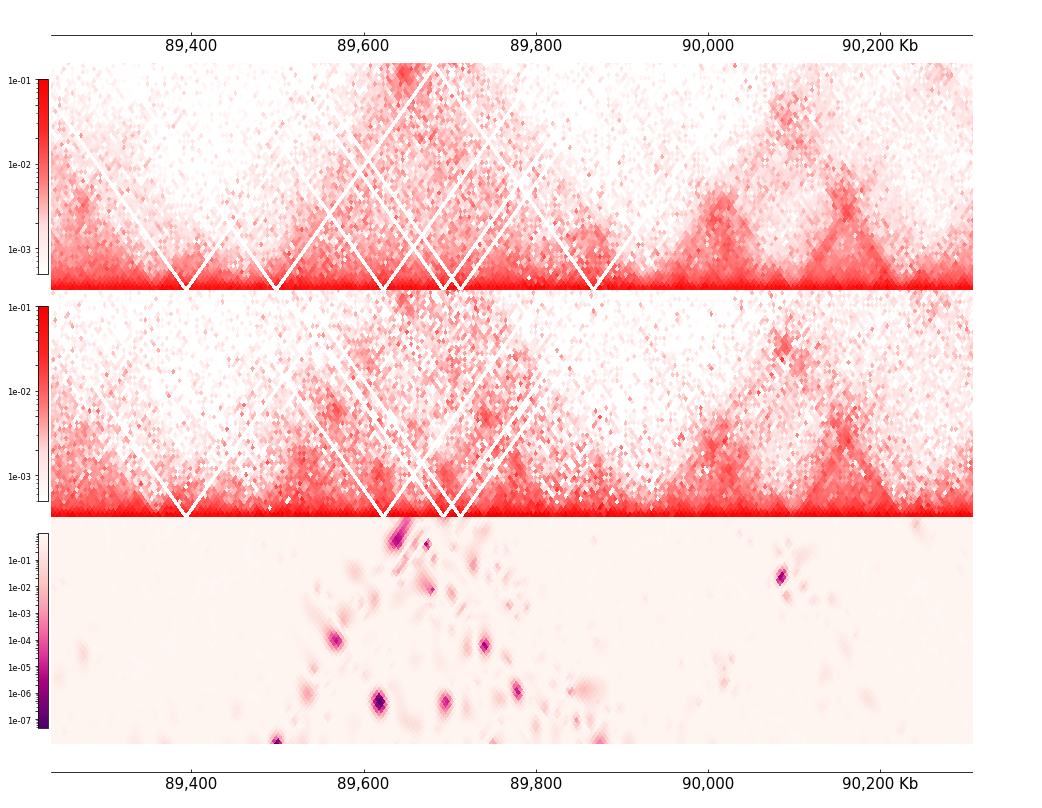

In [4]:
frame = XAxis() + \
    Cool(cl1) + MinValue(5e-4) + MaxValue(1e-1) + \
    Cool(cl2) + MinValue(5e-4) + MaxValue(1e-1) + \
    Selfish(cl1, cl2) + \
    XAxis()
frame *= Feature('depth_ratio', 0.35)
frame.plot(region)

### CLI code

In [5]:
%%bash

data_dir="/home/nanguage/Dropbox/workspace/THP_paper/data/cool"
cl1="${data_dir}/THPP.cool"
cl2="${data_dir}/Ra.cool"

coolbox add XAxis - \
start_with Feature "depth_ratio" "0.35" - \
    add Cool $cl1 - \
    add Cool $cl2 - \
    add Selfish $cl1 $cl2 - \
end_with - \
add XAxis - \
goto "chr1:89237500-90307500" - \
plot /tmp/test_coolbox_selfish.png